<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Relaciones Lineales </font> </center>

In [1]:
from sklearn.datasets import load_wine
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X=np.array([1,2,3])
W=np.array([[1,0,0],[0,0.55,0.3]])
W@X


array([1., 2.])

In [3]:
W.shape

(2, 3)

In [4]:
W.dot(X)

array([1., 2.])

In [5]:
np.dot(W,X)

array([1., 2.])

---
# Relaciones lineales

In [6]:
LW=load_wine()
data=LW.data
names=LW.feature_names
df=pd.DataFrame(data=data,columns=names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
print(LW.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Relación entre `flavanoids` y `ash`

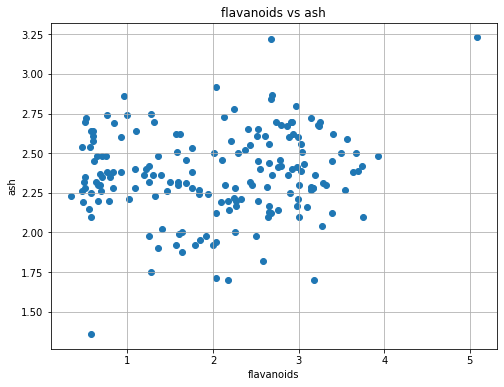

In [13]:
# Gráfica flavanoids vs ash
plt.figure(figsize=(8,6))
plt.scatter(df['flavanoids'],df['ash'])
plt.xlabel('flavanoids')
plt.ylabel('ash')
plt.title('flavanoids vs ash')
plt.grid()

## Relación entre `alcalinity_of_ash` y `ash`

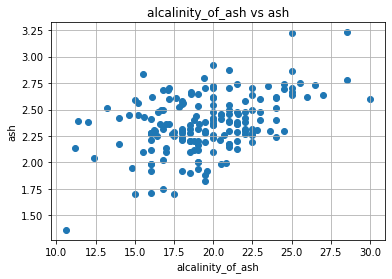

In [15]:
# Gráfica alcalinity_of_ash vs ash
plt.scatter(df['alcalinity_of_ash'],df['ash'])
plt.xlabel('alcalinity_of_ash')
plt.ylabel('ash')
plt.title('alcalinity_of_ash vs ash')
plt.grid()

Encontrar la mejor función lineal que relacione a las variables

In [21]:
minimize?


In [43]:
# Definimos 'fun', el criterio de minimizacion
#
# ash=a[0]+a[1]*flavanoids
# y = mx + b 
# y = AX  ---->  [a0,a1]*[1, x]
def fun(a,x,y):
    f=a[0]+a[1]*x
    return np.mean((f-y)**2)

In [44]:
a0=np.random.rand(2) # Dos elementos uniformemente distrubuidos entre 0 y 1
sol=minimize(fun,a0,args=(df.flavanoids,df.ash))
sol

      fun: 0.07385068681838966
 hess_inv: array([[ 2.47109213, -0.98273504],
       [-0.98273504,  0.48865239]])
      jac: array([6.90575689e-06, 2.18302011e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([2.30239365, 0.03160085])

---
La ecuación óptima que relaciona `flavanoids` y `ash` es 
$$
ash=2.3+0.0316\;flavanoids,
$$
con un $mse=0.07385$.

In [45]:
sol.x

array([2.30239365, 0.03160085])

In [46]:
fun(sol.x,df.flavanoids,df.ash)

0.07385068681838966

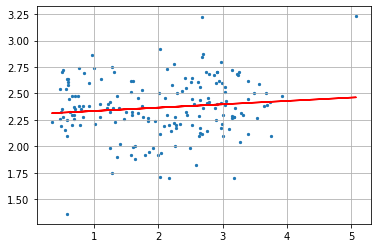

In [47]:
# Flavanoids vs ash
plt.scatter(df.flavanoids,df.ash,s=5) # s=size
x=df.flavanoids
a=sol.x
f_fl_ash=a[0]+a[1]*x #ecuación de la recta
plt.plot(x,f,'r') # 'r'=red
plt.grid() # Cuadrícula de fondo

In [23]:
# Función lineal que relaciona Ash vs su alcalinidad
#
# Usamos la misma función 'fun' (criterio de optimización) y las mismas condiciones iniciales 'a0'
sol2=minimize(fun,a0,args=(df.alcalinity_of_ash,df.ash))
sol2

      fun: 0.06012981364540178
 hess_inv: array([[17.63488726, -0.87894007],
       [-0.87894007,  0.04508554]])
      jac: array([2.79396772e-09, 4.65661287e-09])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([1.65646791, 0.03642221])

---
La ecuación óptima que relaciona `alcalinity_of_ash` con `ash` es
$$
ash=1.656+0.0364\;alcalinity\_of\_ash,
$$
con un $mse=0.06013$.

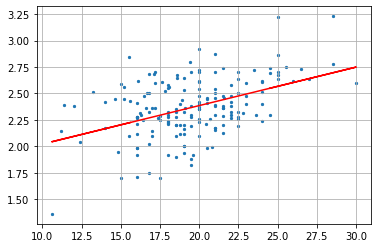

In [24]:
a=sol2.x
x=df.alcalinity_of_ash
f=a[0]+a[1]*x
plt.scatter(x,df.ash,s=5)
plt.plot(x,f,'r')
plt.grid()

## Relación lineal usando Librerías

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lin = LinearRegression()

In [35]:
df['flavanoids'].values.shape

(178,)

In [32]:
df['flavanoids'].shape

(178,)

In [33]:
df[[ 'flavanoids']].shape

(178, 1)

In [36]:
lin.fit(df[[ 'flavanoids']].values,df['ash'])

LinearRegression()

In [37]:
lin.coef_

array([0.03160684])

In [38]:
lin.intercept_

2.3023780616508027

In [42]:
# y = coef_+x +intercept
f_linprog= lin.predict(df[[ 'flavanoids']])

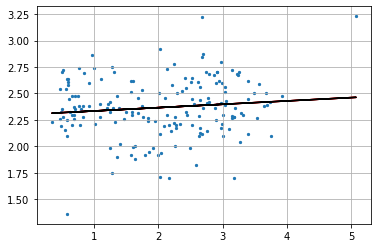

In [49]:
plt.scatter(df.flavanoids,df.ash,s=5) # s=size
x=df.flavanoids
#a=sol.x
#f_m=a[0]+a[1]*x #ecuación de la recta
plt.plot(x,f_fl_ash,'r') # 'r'=red
plt.plot(x,f_linprog,'k') # 'r'=black
plt.grid() # Cuadrícula de fondo

In [ ]:

def get_linear_relations():
    for :
        for:
            a0,a1 =
            d={'ash_vs_alchalinity':[a0,a1],
              'alchalinity_vs_flavanoids':[a0,a1]}
return d